# Our dielectric loss: 

$\Gamma_{1,diel}^{ij} = \frac{16 E_C}{ \hbar Q_{\text{cap}}}  |\bra{i}\hat{n}\ket{j}|^2\times \frac{1}{2} |coth(\frac{1}{2n_{th}}) + 1|$

# The decay rate in 1.8 MHz fluxonium paper:

$\Gamma^{ij} = \omega_{ij}Q_{intr} (n_{th}+1)$ for $\omega_{ij}>0$ (decay)

$\Gamma^{ij} = \omega_{ij}Q_{intr} n_{th}$ for $\omega_{ij}<0$ (heating)

where they write $\gamma = \omega_{ij}Q_{intr}$

# First, $n_{th}$ is an approximation for  $\frac{1}{2} |coth(\frac{1}{2n_{th}}) + 1|$

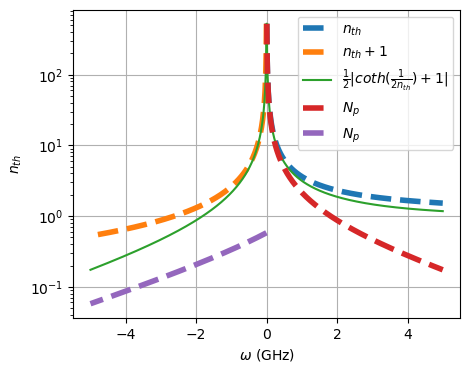

In [10]:
import numpy as np
import matplotlib.pyplot as plt
hbar = 1/(2*np.pi)
kB = 8.617333262e-5  # eV K−1
hbar_in_eVs = 6.5821e-16  # eV s
temp_in_mK = 20

omega = np.linspace(-5, 5, 1000)
x = omega[omega != 0]
nth = (kB * temp_in_mK * 1e-3 ) / (hbar_in_eVs * omega * 1e9) # dimensionless

plt.figure(figsize=(5, 4))
plt.plot(omega[omega>0], nth[omega>0]+1, label=r'$n_{th}$',linestyle='--',lw=4)
plt.plot(omega[omega<0][::-1], nth[omega>0], label=r'$n_{th}+1$',linestyle='--',lw=4)
plt.plot(omega, np.abs(1 / np.tanh(1/(2*nth)) + 1)/2, label=r'$\frac{1}{2}|coth(\frac{1}{2n_{th}})+1|$')
plt.plot(omega[omega>0], 1/( np.exp(1/nth[omega>0]) -1) , label=r'$N_p$',linestyle='--',lw=4)
plt.plot(omega[omega<0][::-1], 1/( np.exp(1/nth[omega>0]+1) -1 ) , label=r'$N_p$',linestyle='--',lw=4)


plt.xlabel(r'$\omega$ (GHz)')
plt.ylabel(r'$n_{th}$')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

## Let's first see if coherence time is reasonable using their equation

In [ ]:
temp_in_mK = 59
omega = 0.0018*2*np.pi
nth = (kB * temp_in_mK * 1e-3 ) / (hbar_in_eVs * omega * 1e9) # dimensionless

small_gamma = 1/(12*1e9) # 1/ns # Their page 13
one_way_decay_lifetime = 1/ (nth*small_gamma)
one_way_decay_lifetime / 1e6 # mu s

17.570057996739045

# Okay, then let's assume their decay is caused all be dielectric loss, then what's their capacitance quality factor, 

# according to $\gamma = \frac{16 E_C}{\hbar Q_{\text{cap}}} |\bra{i}\hat{n}\ket{j}|^2$?

In [26]:
import scqubits
qbt = scqubits.Fluxonium(EJ = 5.178,EC = 0.4144,EL =0.18, cutoff = 110,flux = 0.5,truncated_dim=20)
qbt.eigenvals()[1]-qbt.eigenvals()[0] # 1.8 MHz

0.0018061719406095023

In [32]:
small_gamma = 1/(12*1e9) # 1/ns # Their page 13
Q_cap = 16*0.4144/(hbar*small_gamma)*np.abs(qbt.n_operator()[0,1])**2 
Q_cap # Doesn't make sense

58244139560.02571

In [33]:
Q_intr = 9.6*1e5 # Their page 13
small_gamma_new = (qbt.eigenvals()[1]-qbt.eigenvals()[0])*2*np.pi / Q_intr
Q_cap = 16*0.4144/(hbar*small_gamma_new)*np.abs(qbt.n_operator()[0,1])**2
Q_cap # Still doesn't make sense

410585172.2614689

# Now let's estimate their capacitance quality factor using our formula
# $Q_{\text{cap}}  = \frac{16 E_C}{ \hbar \Gamma_{1,diel}^{ij}}  |\bra{i}\hat{n}\ket{j}|^2\times  n_{th}$

In [62]:
temp_in_mK = 59
omega = 0.0018*2*np.pi
nth = (kB * temp_in_mK * 1e-3 ) / (hbar_in_eVs * omega * 1e9) # dimensionless


Gamma = 1/(34*1e3)/2 # Maybe the unit here is wrong?
Q_cap = 16*0.4144/(hbar*Gamma)*np.abs(qbt.n_operator()[0,1])**2 * nth
Q_cap

225417667.42129275

In [63]:
Gamma_my =  16*0.4144/(hbar*4e6)*np.abs(qbt.n_operator()[0,1])**2 * nth
1 / Gamma_my

1206.6489867967955

# The estimation below also doesn't make sense

In [87]:
from CoupledQuantumSystems.noise import first_order_derivative,second_order_derivative,get_frequency,diel_spectral_density,one_over_f_spectral_density,T_phi
Q_cap  = 4e3
one_over_f_flux_noise_amplitude = 1e-6
conventional_qbt =qbt
phi_conventional = np.abs(conventional_qbt.matrixelement_table('phi_operator',evals_count=3)[0,1])
conventional_qbt_freq = (conventional_qbt.eigenvals()[1]-conventional_qbt.eigenvals()[0])  * 2 * np.pi
conventional_dielectric_lifetime = 1 / (np.abs(phi_conventional)**2 * diel_spectral_density(conventional_qbt_freq, 0.4144,temp_in_mK,Q_cap  )) /1e3
conventional_one_over_f_loss_lifetime = 1 / (np.abs(phi_conventional)**2 * one_over_f_spectral_density(conventional_qbt_freq, 0.18,one_over_f_flux_noise_amplitude ))/1e3


In [88]:
conventional_dielectric_lifetime # micro second

52.452818294841144

In [89]:
conventional_one_over_f_loss_lifetime # micro second

155963.13277062197